In [810]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [811]:
train=pd.read_csv('titanic.csv')
test=pd.read_csv('test.csv')

In [812]:
train.shape

(891, 12)

In [813]:
test.shape

(418, 11)

In [814]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [815]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [816]:
train.drop(columns='Cabin',inplace=True) #dropping cabin column from train

In [817]:
test.drop(columns='Cabin',inplace=True) #dropping cabin column from test

In [818]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [819]:
train['Embarked'].fillna('S',inplace=True)

In [820]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [821]:
#to see missing values

In [822]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [823]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [824]:
#filling missing age

In [825]:
gen_age=np.random.randint(train['Age'].mean()-train['Age'].std() ,train['Age'].mean()+train['Age'].std() ,size=177)

In [826]:
train['Age'][np.isnan(train['Age'])]=gen_age

C:\Users\tuhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [827]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [828]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [829]:
gen_age1=np.random.randint(test['Age'].mean()-test['Age'].std() ,test['Age'].mean()+test['Age'].std() ,size=86)

In [830]:
test['Age'][np.isnan(test['Age'])]=gen_age1

C:\Users\tuhin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [831]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [832]:
#handling missing values done

In [833]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [834]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [835]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


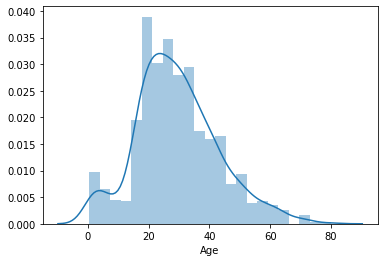

In [836]:
sns.distplot(train['Age'])

In [837]:
train[train['Age']>60]['Survived'].value_counts()

0    17
1     5
Name: Survived, dtype: int64

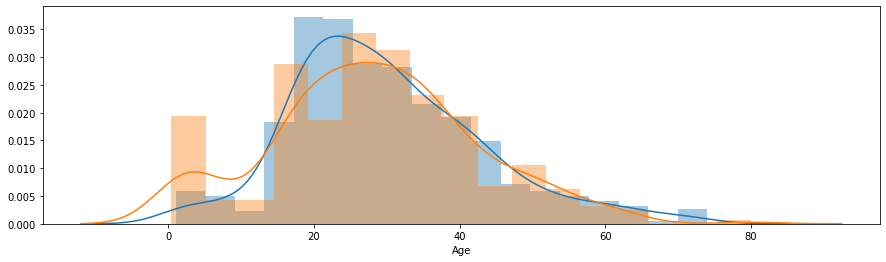

In [838]:
#something is wrong here in the data
plt.subplots(figsize=(15,4))
sns.distplot(train[train['Survived']==0]['Age'])
sns.distplot(train[train['Survived']==1]['Age'])

In [839]:
passengerid=test['PassengerId'].values

In [840]:
train.drop(columns=['PassengerId','Ticket'],inplace=True)

In [841]:
test.drop(columns=['PassengerId','Ticket'],inplace=True)

In [842]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

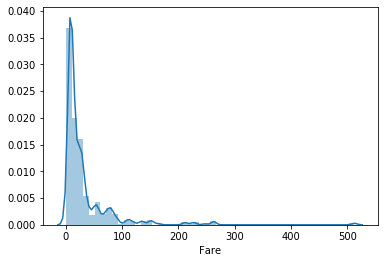

In [843]:
sns.distplot(train['Fare'])

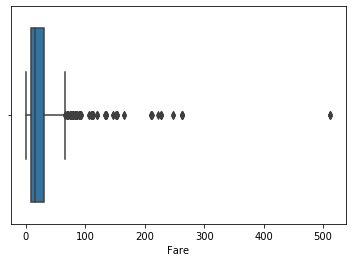

In [844]:
sns.boxplot(train['Fare'])

In [845]:
train[train["Fare"]>250]['Survived'].value_counts()

1    7
0    2
Name: Survived, dtype: int64

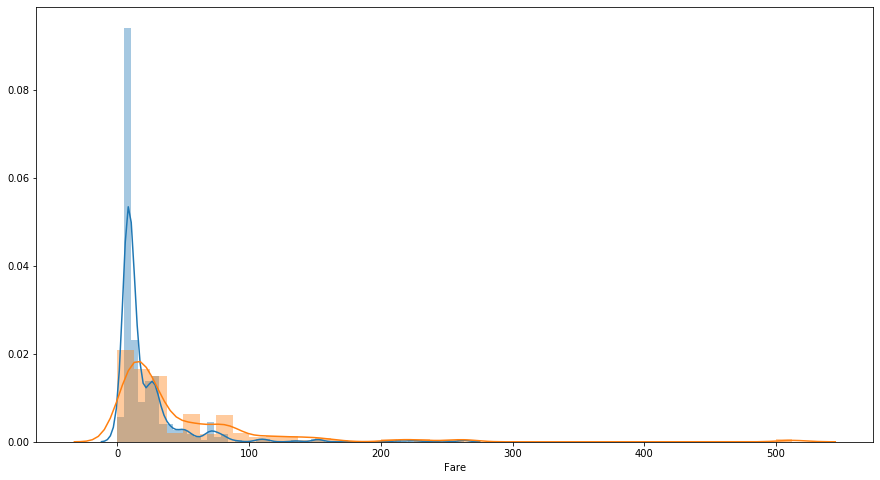

In [846]:
plt.subplots(figsize=(15,8))
sns.distplot(train[train['Survived']==0]['Fare'])
sns.distplot(train[train['Survived']==1]['Fare'])

In [847]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)

In [848]:
train['Family']=train['SibSp']+train['Parch']+1
test['Family']=test['SibSp']+test['Parch']+1

In [849]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [850]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [851]:
train[['Family','Survived']].groupby('Family').mean()

,Survived
Family,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [852]:
def family_size(number):
    if number==1:
        return("Alone")
    elif number>1 and number<=5:
        return("Small")
    else:
        return("Large")

In [853]:
train['Family_size']=train['Family'].apply(family_size)

In [854]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Family_size
0,0,3,male,22.0,7.2500,S,2,Small
1,1,1,female,38.0,71.2833,C,2,Small
2,1,3,female,26.0,7.9250,S,1,Alone
3,1,1,female,35.0,53.1000,S,2,Small
4,0,3,male,35.0,8.0500,S,1,Alone


In [855]:
test['Family_size']=test['Family'].apply(family_size)

In [856]:
train.drop(columns='Family', inplace=True)

In [857]:
test.drop(columns='Family', inplace=True)

In [858]:
y=train['Survived'].values

In [859]:
train.drop(columns='Survived', inplace=True)

In [860]:
train.shape

(891, 6)

In [861]:
test.shape

(418, 6)

In [862]:
final=train.append(test) #vertically merging train and test

In [863]:
final=pd.get_dummies(final, columns=['Pclass','Sex','Embarked','Family_size'],drop_first=True)

In [864]:
final.shape

(1309, 9)

In [865]:
xf=final.tail(418).values

In [866]:
x=final.head(891).values

In [867]:
x.shape

(891, 9)

In [868]:
y.shape

(891,)

In [869]:
from sklearn.model_selection import train_test_split

#spliting
X_train , X_test , Y_train , Y_test = train_test_split(x,y, test_size=0.2)

In [870]:
#decisiontree
from sklearn.tree import DecisionTreeClassifier
clf =  DecisionTreeClassifier()

In [871]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [872]:
Y_pred=clf.predict(X_test)

In [873]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8156424581005587

In [874]:
yf=clf.predict(xf)

In [875]:
yf.shape

(418,)

In [876]:
submission=pd.DataFrame()

In [879]:
submission['PassengerId']=passengerid
submission['Survived']=yf

In [881]:
submission.to_csv('submission.csv', index=False)